This example implements the first model from "Modeling civil violence: An agent-based computational approach," by Joshua Epstein.  The paper (pdf) can be found [here](http://www.uvm.edu/~pdodds/files/papers/others/2002/epstein2002a.pdf).

The model consists of two types of agents: "Citizens" (called "Agents" in the paper) and "Cops."  Agents decide whether or not to rebel by weighing their unhappiness ('grievance') against the risk of rebelling, which they estimate by comparing the local ratio of rebels to cops.  




In [25]:
import matplotlib.pyplot as plt

%matplotlib inline


from epstein_civil_violence.model import EpsteinCivilViolence
from mesa import batch_run
import numpy as np
import pandas as pd

In [3]:
model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=8,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=200,
)  # cap the number of steps the model takes
model.run_model()

    # def __init__(
    #     self,
    #     width=40,
    #     height=40,
    #     citizen_density=0.7,
    #     cop_density=0.074,
    #     citizen_vision=7,
    #     cop_vision=7,
    #     legitimacy=0.8,
    #     max_jail_term=1000,
    #     active_threshold=0.1,
    #     arrest_prob_constant=2.3,
    #     movement=True,
    #     max_iters=1000,
    # )

/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


The model's data collector counts the number of citizens who are Active (in rebellion), Jailed, or Quiescent after each step.

In [4]:
model_out = model.datacollector.get_model_vars_dataframe()

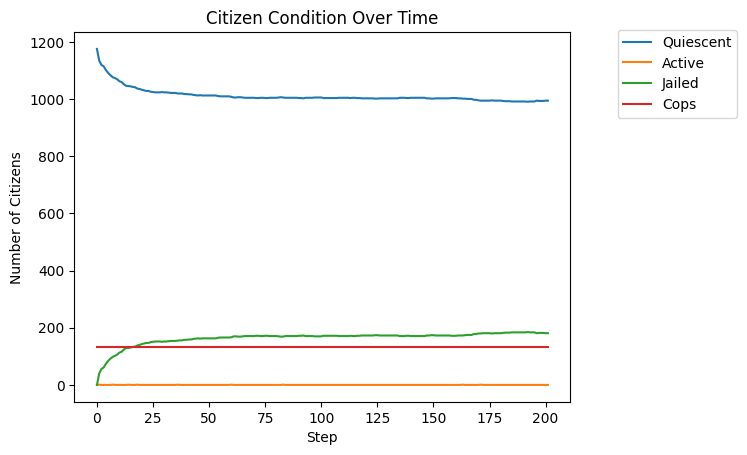

In [5]:
ax = model_out.plot()
ax.set_title("Citizen Condition Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Citizens")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [6]:
### Low legitimacy, high efficiency

model2 = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=7,
    legitimacy=0.3,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
) 


In [7]:
model_out2 = model2.datacollector.get_model_vars_dataframe()

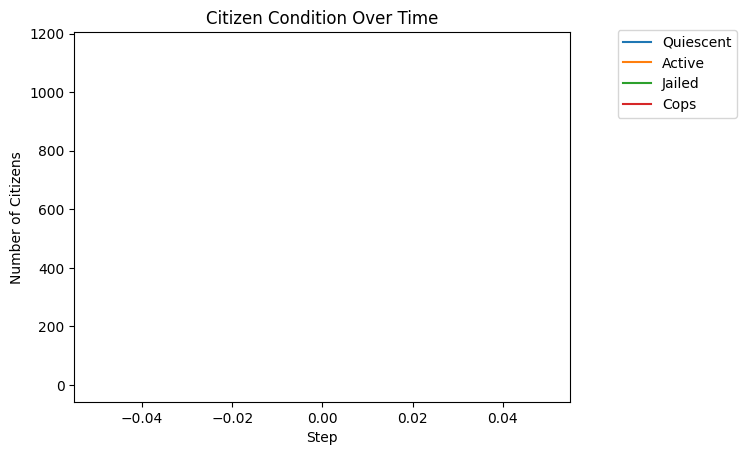

In [8]:
ax = model_out2.plot()
ax.set_title("Citizen Condition Over Time")
ax.set_xlabel("Step")
ax.set_ylabel("Number of Citizens")
_ = ax.legend(bbox_to_anchor=(1.35, 1.025))

In [28]:
#### Low legitimacy low cop efficiency

model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.074,
    citizen_vision=3,
    cop_vision=7,
    legitimacy=0.2,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
) 

Effect of Legitimacy on quiescent citizens

In [19]:


parameters = {
    "height":40,
    "width":40,
    "citizen_density":0.7,
    "cop_density":0.074,
    "citizen_vision":3,
    "cop_vision":7,
    "legitimacy":np.arange(0.0, 1.0, 0.1),
    "max_jail_term":1000,
    "active_threshold":0.1,
    "arrest_prob_constant":2.3,
    "movement":True,
    "max_iters":1000,
}
# variable_parms = {"legitimacy": np.linspace(0,0.1, 1)}

In [20]:
results = batch_run(EpsteinCivilViolence, 
                    parameters,
                    iterations=50,  
                    max_steps=100, 
                    number_processes = 10)

  0%|          | 0/500 [00:00<?, ?it/s]

/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/

In [68]:
pd.DataFrame(results).to_csv("epstein_batch_data.csv")

In [69]:
df = pd.read_csv("epstein_batch_data.csv")

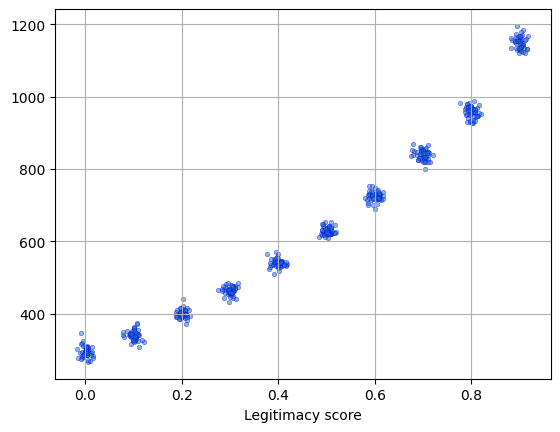

In [96]:
jitter_strength = 0.006
df['legitimacy'] += np.random.normal(0, jitter_strength, df['legitimacy'].shape)

plt.scatter(df['legitimacy'], df['Quiescent'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)
plt.xlabel("Legitimacy score")  
plt.grid(True)
plt.show()


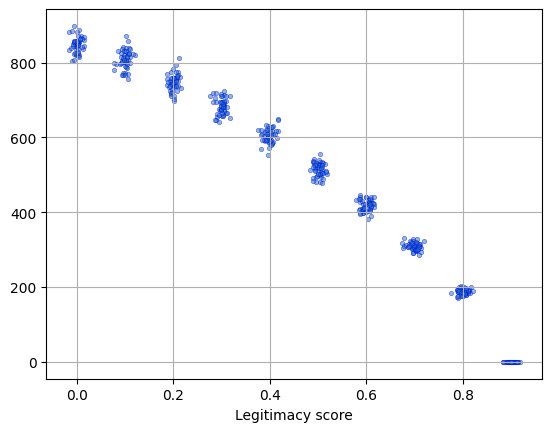

In [97]:

plt.scatter(df['legitimacy'], df['Jailed'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)  
plt.grid(True)
plt.xlabel("Legitimacy score")
plt.show()

In [72]:
parameters2 = {
    "height":40,
    "width":40,
    "citizen_density":0.7,
    "cop_density":0.074,
    "citizen_vision":3,
    "cop_vision":range(1,10,1),
    "legitimacy":0.7,
    "max_jail_term":1000,
    "active_threshold":0.1,
    "arrest_prob_constant":2.3,
    "movement":True,
    "max_iters":1000,
}

In [30]:
results2 = batch_run(EpsteinCivilViolence, 
                    parameters2,
                    iterations=50,  
                    max_steps=100, 
                    number_processes = 10)

  0%|          | 0/450 [00:00<?, ?it/s]

/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/

In [35]:
pd.DataFrame(results2).to_csv("epstein_batch_data2.csv")

In [80]:
df2 = pd.read_csv("epstein_batch_data2.csv")

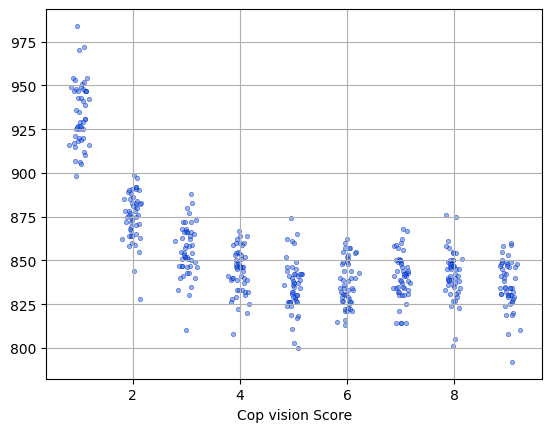

In [98]:
jitter_strength = 0.05
df2['cop_vision'] += np.random.normal(0, jitter_strength, df2['cop_vision'].shape)

plt.scatter(df2['cop_vision'], df2['Quiescent'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)  
plt.grid(True)
plt.xlabel("Cop vision Score")
plt.show()

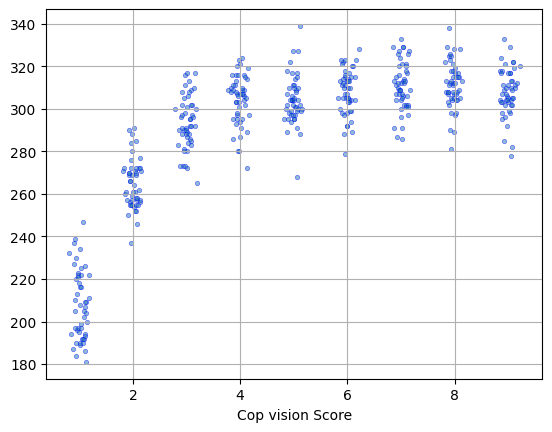

In [99]:
plt.scatter(df2['cop_vision'], df2['Jailed'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)  
plt.grid(True)
plt.xlabel("Cop vision Score")
plt.show()

In [40]:
parameters3 = {
    "height":40,
    "width":40,
    "citizen_density":0.7,
    "cop_density":0.074,
    "citizen_vision":3,
    "cop_vision":7,
    "legitimacy":0.7,
    "max_jail_term":1000,
    "active_threshold":np.arange(0.0, 1.0, 0.1),
    "arrest_prob_constant":2.3,
    "movement":True,
    "max_iters":1000,
}

In [41]:
results3 = batch_run(EpsteinCivilViolence, 
                    parameters3,
                    iterations=50,  
                    max_steps=100, 
                    number_processes = 10)

                    

  0%|          | 0/500 [00:00<?, ?it/s]

/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/santiagosatizabal/anaconda3/lib/python3.10/site-packages/

In [42]:
pd.DataFrame(results3).to_csv("epstein_batch_data3.csv")

In [93]:
df3 = pd.read_csv("epstein_batch_data3.csv")

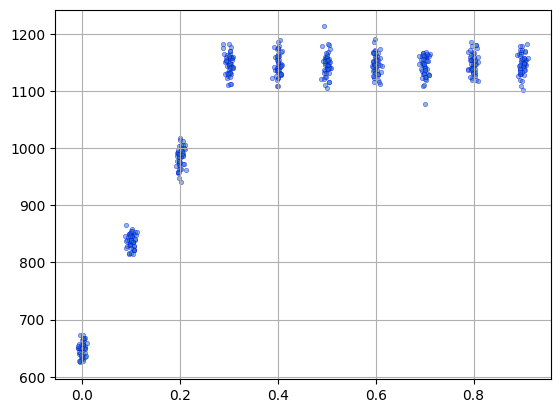

In [94]:
jitter_strength = 0.005
df3['active_threshold'] += np.random.normal(0, jitter_strength, df3['active_threshold'].shape)

plt.scatter(df3['active_threshold'], df3['Quiescent'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)  
plt.grid(True)
plt.show()

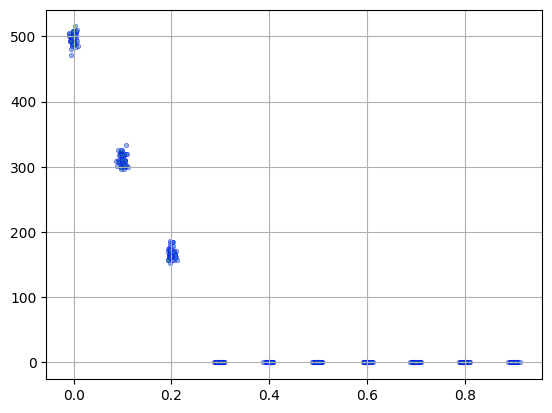

In [95]:
plt.scatter(df3['active_threshold'], df3['Jailed'], s=10, 
            alpha=0.5,  
            edgecolors='blue', 
            linewidths=0.5)  
plt.grid(True)
plt.show()